In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv('titanic_train.csv')

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
data.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

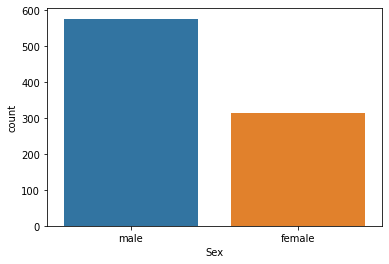

In [50]:
sns.countplot(data['Sex'])

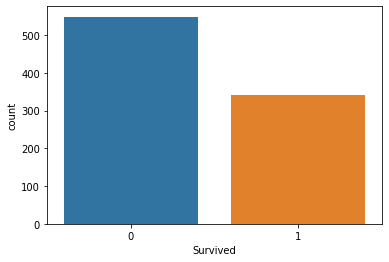

In [51]:
sns.countplot(data['Survived'])

In [52]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
cols_to_drop = ['PassengerId','Name','Ticket','Cabin','Embarked']

In [55]:
data = data.drop(cols_to_drop,axis=1)

In [56]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()

In [59]:
data['Sex'] = le.fit_transform(data['Sex'])

In [60]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


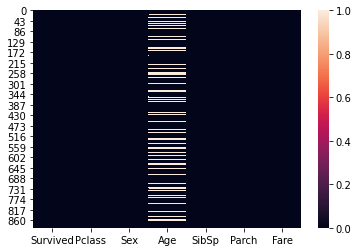

In [61]:
sns.heatmap(data.isnull())

In [62]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [63]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [64]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [65]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


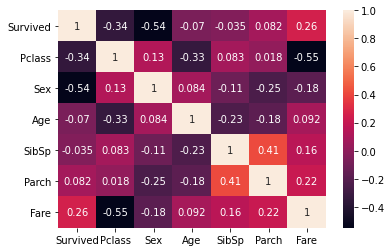

In [66]:
sns.heatmap(data.corr(),annot=True)

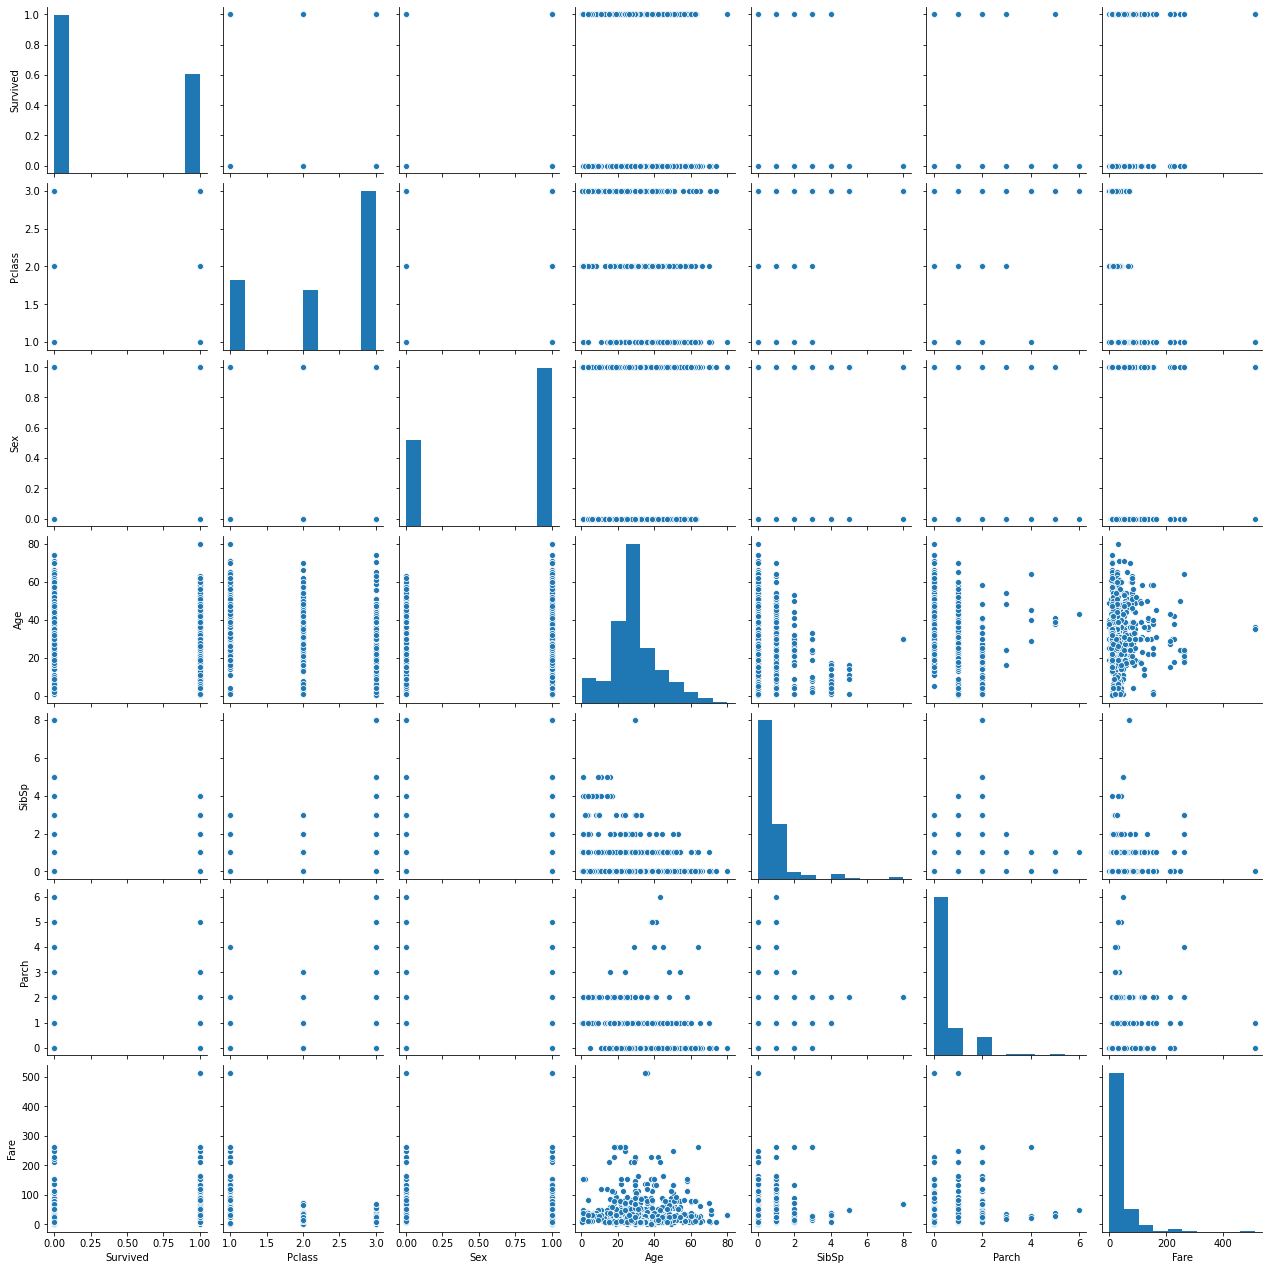

In [106]:
sns.pairplot(data,hue=None)

In [67]:
X = data.drop('Survived',axis=1)

In [68]:
y = data['Survived']

In [69]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [70]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [71]:
X.shape

(891, 6)

In [74]:
y.shape

(891,)

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
Dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [102]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
Dt.score(X_test,y_test)

0.8203389830508474

In [104]:
Dt.predict(X_test[:10])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [105]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

# Visualising Decision Tree


In [107]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

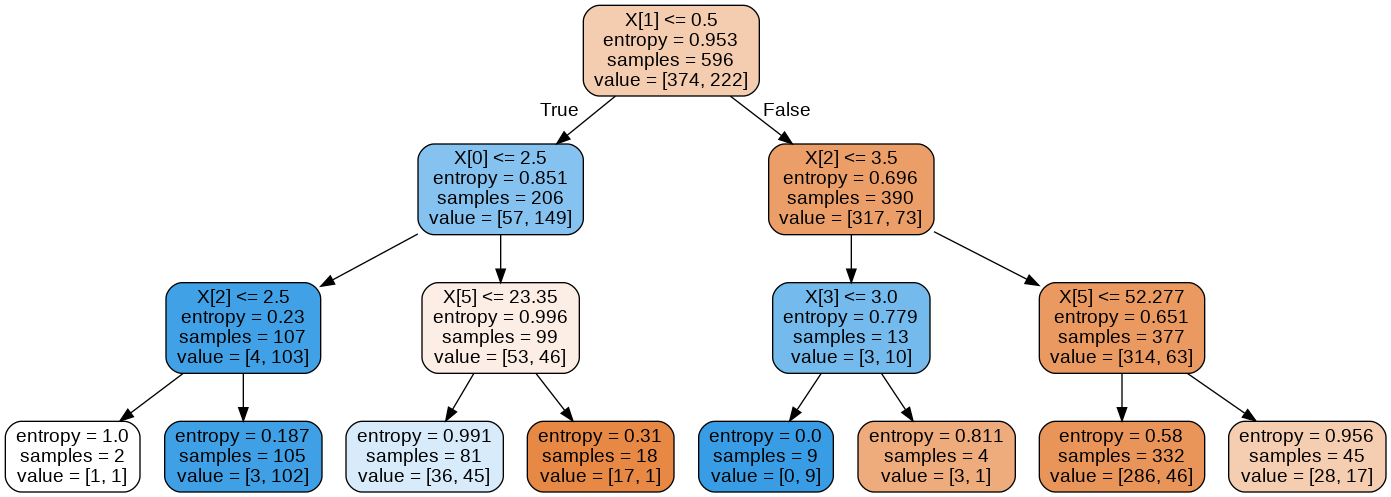

In [109]:
dot_data = StringIO()
export_graphviz(Dt, out_file = dot_data, filled= True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
